# 集成学习

三个臭皮匠，胜过诸葛亮，集成学习就是靠着集成各个基学习器的能力，达到集思广益的目的。

集成学习（Ensemble Learning）是一种机器学习方法，它通过结合多个基学习器（Base Learner）的预测结果，来提升模型的整体性能。与单一模型相比，集成学习能够更好地捕捉数据的多样性、降低误差和增强泛化能力。集成学习主要有Bagging、Boosting方法。

## Bagging

Bagging（Bootstrap Aggregating）是一种集成学习方法，通过结合多个弱学习器的预测结果来提高模型的准确性和稳定性。它是随机森林等模型的核心技术之一。

Bagging基于**并行策略**进行学习，主要步骤如下：
1. **自助采样**：从原始数据集中随机有放回地抽取样本，生成多个训练子集
2. **训练多个弱学习器**：用每个训练子集训练一个弱学习器
3. **集成预测**：对多个弱学习器的预测结果进行整合
    - 分类任务：使用投票法，也即统计每个弱学习器的分类结果，选择出现次数最多的类别作为最终预测结果。
    - 回归任务：使用平均法：将所有弱学习器的预测结果取平均值，作为最终预测结果。

## Boosting

Boosting 是一种集成学习技术，通过将多个弱学习器（如浅层决策树）组合成一个强学习器来提高模型的预测性能。与 Bagging 不同，Boosting 采用**逐步修正错误**的方式，关注每一轮学习中的错误样本，使模型在困难样本上的表现逐渐提升。

Boosting应用**迭代式学习**的方式进行学习，每次训练使用全部样本数据 ，主要步骤如下：
1. 使用初始训练集训练一个基学习器，其中各样本权重相同
2. 根据上一步中基学习器的表现调整样本权重，使得分类错误样本得到更多关注
3. 基于调整后后的样本训练下一个基学习器，并重复以上过程
4. 对各基学习器加权得到最终结果

Boosting应用迭代式学习的方式进行学习，每次训练使用全部样本数据
具体来说：
第一步使用初始训练集训练一个基学习器，其中各样本权重相同
第二步根据上一步中基学习器的表现调整样本权重，使得分类错误样本得到更多关注
第三步基于调整后后的样本训练下一个基学习器
第四步对各基学习器加权得到最终结果

# 随机森林模型

## 随机森林原理介绍

随机森林是以决策树作为弱学习器的Bagging算法。主要步骤如下：
1. **自助采样生成子训练集**：
    - 训练集采样：从原始训练集中有放回地抽取$N$个样本，生成子训练集。
    - 特征采样：随机选择$m$个特征
2. **训练多个弱学习器**：用每个子训练集与随机选择的特征训练一个弱学习器（决策树）
3. **生成森林**：重复以上步骤$T$次（即生成$T$棵决策树，树成林），决策树间相互独立
3. **集成预测**：对多个弱学习器的预测结果进行整合
    - 分类任务：使用投票法，也即统计每棵决策树的分类结果，选择出现次数最多的类别作为最终预测结果。
    - 回归任务：使用平均法：将所有决策树的预测结果取平均值，作为最终预测结果。

## 随机森林优缺点

### 随机森林优点

- **鲁棒性强**：对于噪声数据、缺失值和异常值不敏感，因为随机森林通过集成学习（多棵树）的方式减少单个模型的偏差和方差
- **防止过拟合**：通过随机采样训练集数据和特征，随机森林减少了单棵树的过拟合风险，提升了泛化能力
- **支持分类和回归**：集成预测阶段，随机森林使用投票法处理分类任务，使用平均法处理回归任务，因此可以同时处理分类问题与回归问题。
- **内置特征选择**：随机森林可以评估每个特征的重要性（feature_importances_），为特征选择提供有价值的参考
- **处理高维数据**：能有效处理包含许多特征（高维数据）的数据集，而不需要提前降维
- **抗类别不平衡**：可以通过调整 class_weight 参数来处理类别不平衡问题
- **并行化训练**：每棵树是独立训练的，因此支持并行化计算（通过设置 n_jobs 参数），训练速度较快

### 随机森林缺点

- **预测速度慢**：随机森林预测时需要计算所有树的预测结果并进行集成，因此预测速度较慢
- **模型解释性差**：随机森林是一个“黑箱模型”，难以像单棵决策树那样清晰地解释模型的决策过程
- **计算资源消耗高**：随机森林训练时需要储存多棵决策树，因此内存占用较大

## 随机森林使用场景

- **数据包含噪声或异常值**：随机森林对异常值和噪声数据具有较强的鲁棒性。因为随机森林通过集成学习（多棵树）的方式减少单个模型的偏差和方差
- **特征重要性分析**：随机森林可以通过 feature_importances_ 提供特征对目标变量的贡献度，用于特征选择或解释模型。因此可以在特征解释或者特征分析场景使用
- **中小型数据集**：随机森林在中小型数据集上（几千到几万样本）通常表现优异
- **类别不平衡问题**：随机森林结合 class_weight 能很好地应对类别不平衡问题


# 随机森林案例（分类）

## RandomForestClassifier

- **n_estimators**：随机森林中树的数量（决策树的个数）。
    - 更多的树通常会提升模型的性能，但也会增加训练和预测的时间成本。
- **criterion**：树节点分裂时的指标
    - 'gini'：使用Gini不纯度
    - 'entropy'：使用信息增益
- **max_depth**：决策树的最大深度。
    - 通过限制树的深度，可以防止模型过拟合
- **min_samples_split**：控制内部节点分裂所需的最小样本数。
    - 较大的值可以减少模型的过拟合。
- **min_samples_leaf**：叶子节点所需的最小样本数
    - 避免叶子节点包含少量样本，可以减少过拟合
- **max_features**：在每次分裂时考虑的最大特征数
    - 随机选取部分特征可以增加模型的随机性，从而减少过拟合
- **n_jobs**：指定并行训练的线程数，可以大幅加速训练过程
- **random_state**：设置随机种子，用于结果的可复现性
- **verbose**：控制是否打印训练过程中的输出信息
    - 0：不输出
    - 1：每完成一棵树的训练输出信息
    - 2：每完成一次并行操作输出信息
- **class_weight**：调整类别的权重，以处理类别不平衡问题。对于类别不平衡数据，建议设置为 "balanced"
    - "balanced"：根据类别频率自动调整权重为 $n_\text{samples} / (n_\text{classes} \times n_\text{samples in class})$。
    - "balanced_subsample"：类似于 "balanced"，但只基于每棵树的引导样本计算权重。
    - 字典形式：手动设置各类别的权重，如 {0: 1, 1: 5}。

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [18]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

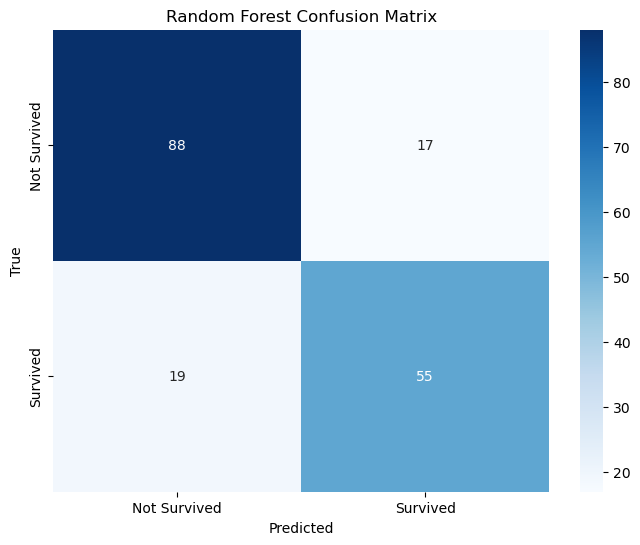

Classification Report:
              precision    recall  f1-score   support

           0     0.8224    0.8381    0.8302       105
           1     0.7639    0.7432    0.7534        74

    accuracy                         0.7989       179
   macro avg     0.7932    0.7907    0.7918       179
weighted avg     0.7982    0.7989    0.7985       179



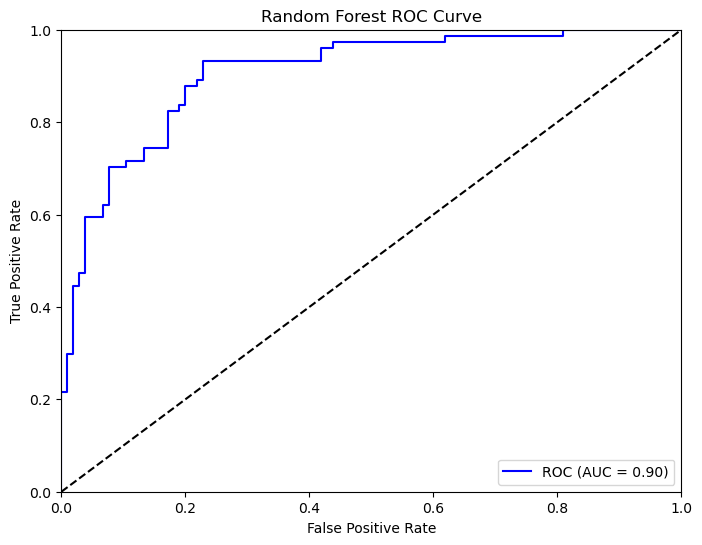

In [19]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features].dropna()  # 删除缺失值
y = df['survived']  # 目标变量：生还状态

# 划分训练集验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
rf_clf = RandomForestClassifier(
    n_estimators=100,        # 树的数量
    criterion='gini',        # 分裂标准
    max_depth=7,             # 单棵树最大深度
    min_samples_split=10,    # 节点分裂最小样本数
    min_samples_leaf=5,      # 叶节点最小样本数
    max_features='sqrt',     # 每棵树考虑的特征数
    class_weight='balanced', # 处理类别不平衡
    bootstrap=True,           # 使用Bootstrap抽样
    oob_score=True,          # 计算OOB误差
    random_state=42
)

# 训练模型
rf_clf.fit(X_train, y_train)

# 模型评估
y_probs = rf_clf.predict_proba(X_test)[:, 1]  # 生存概率
y_pred = rf_clf.predict(X_test)

# 1. 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 3. ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 随机森林可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [20]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 从随机森林中选择一棵树
single_tree = rf_clf.estimators_[1]

# 决策树可视化
# 文本形式展示决策规则
tree_rules = export_text(single_tree, feature_names=features)
print("\n决策规则:")
print(tree_rules)


决策规则:
|--- sex <= 0.50
|   |--- fare <= 48.20
|   |   |--- sibsp <= 3.50
|   |   |   |--- age <= 8.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  8.50
|   |   |   |   |--- pclass <= 2.50
|   |   |   |   |   |--- embarked <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- embarked >  0.50
|   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- age >  27.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- pclass >  2.50
|   |   |   |   |   |--- parch <= 0.50
|   |   |   |   |   |   |--- embarked <= 1.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- embarked >  1.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- parch >  0.50
|   |   |   |   |   |   |--- fare <= 23.25
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- fare >  23.25
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |--- sibsp >  3.50
|   |   |

## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

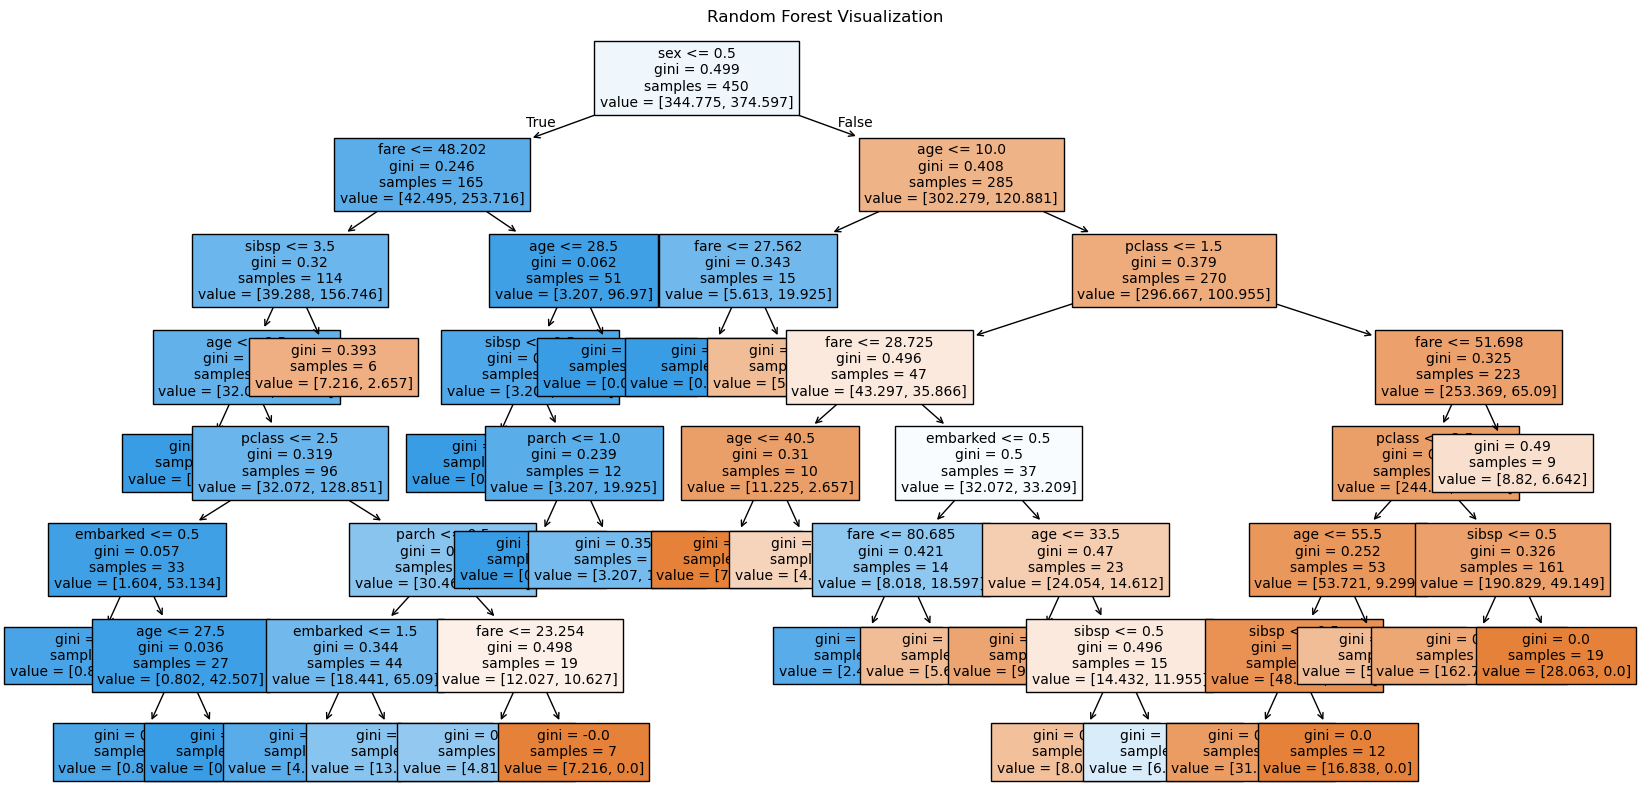

In [17]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 从随机森林中选择一棵树
single_tree = rf_clf.estimators_[1]

# 使用 sklearn 内置的 plot_tree 方法可视化
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=features, filled=True, fontsize=10)
plt.title("Random Forest Visualization")
plt.show()

# 特征重要度

**特征重要性(feature importance)**是随机森林模型中用于衡量各个特征对预测结果贡献程度的指标。
- 对于随机森林中的每棵树，每次决策树在某特征上进行划分时，都会带来一定的不纯度下降（例如 Gini 指数下降）。 
- 把所有由该特征引起的不纯度下降值累加，再进行归一化（总和为 1），即可得到特征重要度。
- 计算公式为：
$$\text{Importance}_j = \frac{1}{N_{\text{trees}}} \sum_{T} \sum_{t \in T} \frac{\text{ΔGini}_t}{\text{TotalSplits}_T} \cdot I(j \in t)
$$
- 其中：
    - $\text{ΔGini}_t$：节点$t$的基尼不纯度下降 
    - $I(j \in t)$：指示函数（特征$j$是否用于分裂）
    - $N$：随机森林中树的棵树 

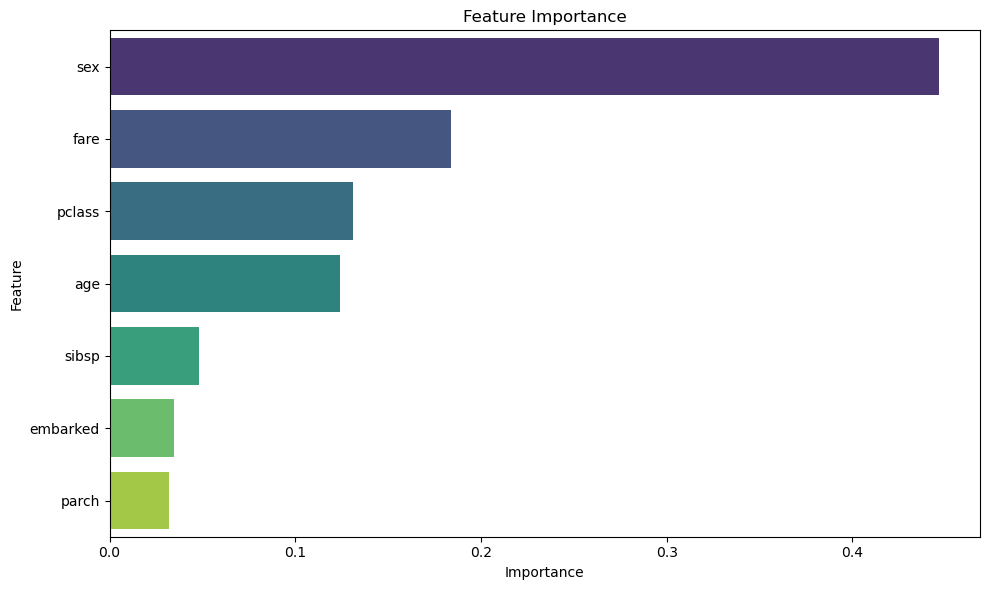

In [21]:
# 特征重要性
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()